# K- Means Clustering Practice

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans

# Load the iris dataset and make Data Frame
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### **Finding the optimum number of clusters for K-Means and determining the value of K.**

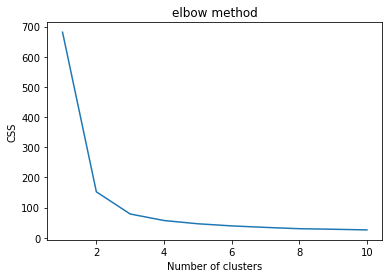

In [2]:
# Finding the optimum number of clusters for k-means classification

x = iris_df.iloc[:, :].values #iloc[rows, cols]
# print(x[:5])
x = iris_df.iloc[:, [0,1,2,3]].values #iloc[rows, cols]
# print(x[:5])

# Cluster Sum of Squares
css = []

# 'elbow curve' to find ideal number of clusters
# choose range where "ideal" most likely lies
# ideal is at the kink (elbow) in the resulting curve
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(x)
    css.append(kmeans.inertia_)
    
# Plotting the results onto a line graph 
# allowing us to observe 'The elbow'
plt.plot(range(1, 11), css)
plt.title('elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('CSS') # Within cluster sum of squares
plt.show()

from this we can see we want to select 2 or 3, since the first 'kink' is in 3, we select that

In [3]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(x)
# print(y_kmeans)
# print(kmeans.cluster_centers_) # FOUR DIMENSIONS????

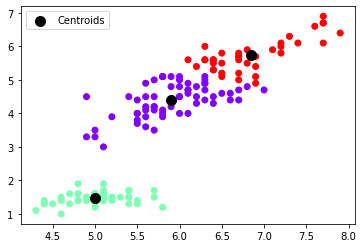

In [12]:
# Visualising the clusters - On the first two columns
plt.scatter(x[:, 0], x[:, 2], c=y_kmeans, cmap = 'rainbow')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,2], 
            s = 100, c = 'black', label = 'Centroids')
plt.legend()
plt.savefig("kmeans clustering.png", bbox_inches='tight')